# Customer Segmentation Using Clustering

## Introduction 

**AIM**

The aim of this project was to cluster data from a mall to find appropraite cutomer bases to target with adverts

**BACKGROUND**

The data was taken from [kaggle](https://www.kaggle.com/shwetabh123/mall-customers/data) and consists of a data set of mall customers. 

This project was an introduction into clustering with machine learning.

## Exploring the Data


In [15]:
#relevant modules were imported
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

#the data from the csv was imported
#mall_customers = pd.read_csv('mall_customers.csv')
#mall_customers.head()

The column headings were transformed into snakecase for uniformity.

In [2]:
replace = {'CustomerID':'customer_id', 'Genre':'gender','Age':'age', 'Annual Income (k$)':'annual_income_k$', 'Spending Score (1-100)':'spending_score_1-100'}
mall_customers.rename(columns = replace, inplace = True)

print(mall_customers.head())

   customer_id  gender  age  annual_income_k$  spending_score_1-100
0            1    Male   19                15                    39
1            2    Male   21                15                    81
2            3  Female   20                16                     6
3            4  Female   23                16                    77
4            5  Female   31                17                    40


Each column was then explored to see the data:

**Gender**

In [3]:
gender_perc = mall_customers['gender'].value_counts(normalize = True)*100
print(gender_perc)

Female    56.0
Male      44.0
Name: gender, dtype: float64


Text(0,0.5,'Gender')

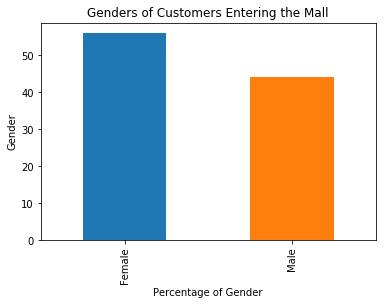

In [4]:
gender_perc.plot(kind = 'bar', 
                 x = gender_perc.index, 
                 y = gender_perc,
                 title = 'Genders of Customers Entering the Mall',
                )
plt.xlabel('Percentage of Gender')
plt.ylabel('Gender')

It can be seen that ~10% more of customers were female.

**Age**

In [5]:
mall_customers['age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

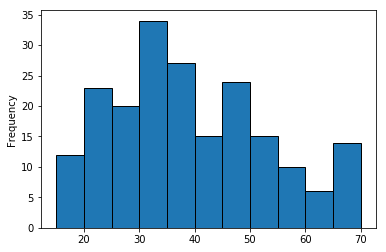

In [40]:
mall_customers['age'].plot(kind = 'hist', range = [15,70], edgecolor = 'black', bins = 11,  )

The most common age is around 35 year old.

**Anual Income**

In [24]:
mall_customers['annual_income_k$'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: annual_income_k$, dtype: float64

C:\Users\rusco\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


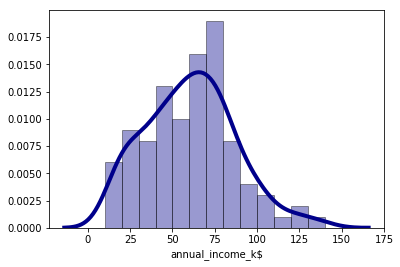

In [41]:
sns.distplot(mall_customers['annual_income_k$'], kde=True, 
             hist = True,
             bins = 13,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black', 'range': (10,140)},
             kde_kws={'linewidth': 4}
            )
        

The most common annual income is around 75k$

**Spending Score**

In [35]:
mall_customers['spending_score_1-100'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending_score_1-100, dtype: float64

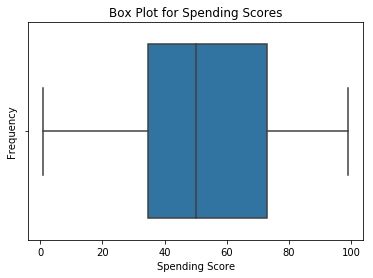

In [38]:
ax = sns.boxplot(x="spending_score_1-100",
                 data=mall_customers
                ).set(
                      xlabel='Spending Score', 
                      ylabel='Frequency',
                      title = 'Box Plot for Spending Scores'
                     )

Text(0.5,0,'Spending Score')

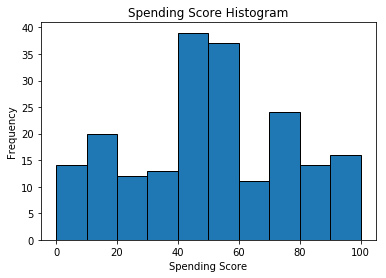

In [39]:
mall_customers['spending_score_1-100'].plot(kind = 'hist', range = [0,100], edgecolor = 'black', bins = 10, title = 'Spending Score Histogram')

plt.xlabel('Spending Score')

The most common spending scores are around 40-60

## Clustering the Data

For clustering data. There is a centroidpoint that the cluster will fall into. Each x value belongs to the centroid that it is closest to. 

In [73]:
#A function for finding the closest centroids and intialising centroids
#A function to initialise centroids
def init_centroid():
    return 1
def find_closest_centroid(x_data,centroids):
    idx = []
    for x in x_data:
        print(x)
        idx_x = 0
        centroid_size = 10000000;
        for j in range(1,len(centroids)+1):
            print(len(centroids))
            print(j)
            centroid_size_calc = abs(x - centroids[j])
            print(centroids[j])
            centroid_size_calc_t = (centroid_size_calc[np.newaxis]).T
            centroid_size_calc = centroid_size_calc.dot(centroid_size_calc_t)
            if centroid_size_calc < centroid_size:
                centroid_size = centroid_size_calc
                idx_x = j
        idx.append(idx_x)
    return idx

In [74]:
#The aim of this model will be to minimise the cost function, J
#This represents the sum of the squared distances for each data point assigned to uk
#def cost_function(mew, x, r):
 #   sum(x-mew)

In [75]:
print(find_closest_centroid(np.array([[1,2],[2,3],[4,4],[20,20],[50,50]]),np.array([[2,2], [30,30]])))

[1 2]
2
1
[30 30]
2
2


IndexError: index 2 is out of bounds for axis 0 with size 2